# Case Study 1 : Testing on synthetic data


Models evaluation on synthetic rhythmic data with:
- multiple component (n_components=1,2,3)
- Different levels of noise (0.3, 0.6, 0.9)
- Replicates as 1 since ARS oly work when there isn't replicates
- We create 10000 line by file half is random

Steps :
- Create dataset and perform rda analysis
- Plot Matthew's Correlation Coefficient for models evaluation
- Other Metrics Plots 

In [1]:
#import
from rda_package import rda 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
N_TEST=10000
REPLICATES=1


Unable to determine R home: [WinError 2] Le fichier spécifié est introuvable
Unable to determine R library path: Command '('C:\\Program Files\\R\\R-4.1.3\\bin\\Rscript', '-e', 'cat(Sys.getenv("LD_LIBRARY_PATH"))')' returned non-zero exit status 1.


## Create dataset and perform rda analysis

In [ ]:
#3h
for x in [1,2,3,4,5]:
    for i in [1,2,3]:
        for j in [1,2,3]:
            FILENAME=f"c{i}_n0{3*j}_t{x}.csv"
            folder_in = f'Out/{FILENAME[:-4]}/'
            NOISE=float(0.3*j)
            N_COMPONENTS=int(i)
            rda.synt_rhythmic_data(FILENAME,half_rnd=True,n_test=N_TEST,n_components=N_COMPONENTS,noise=NOISE,replicates=REPLICATES)
            rda.file_rda(folder_in+FILENAME,metrics=True,half_rnd=True,n_components=N_COMPONENTS,pvalue=True)

## Plot Matthew's Correlation Coefficient for models evaluation

MCC models evaluation using qvalue

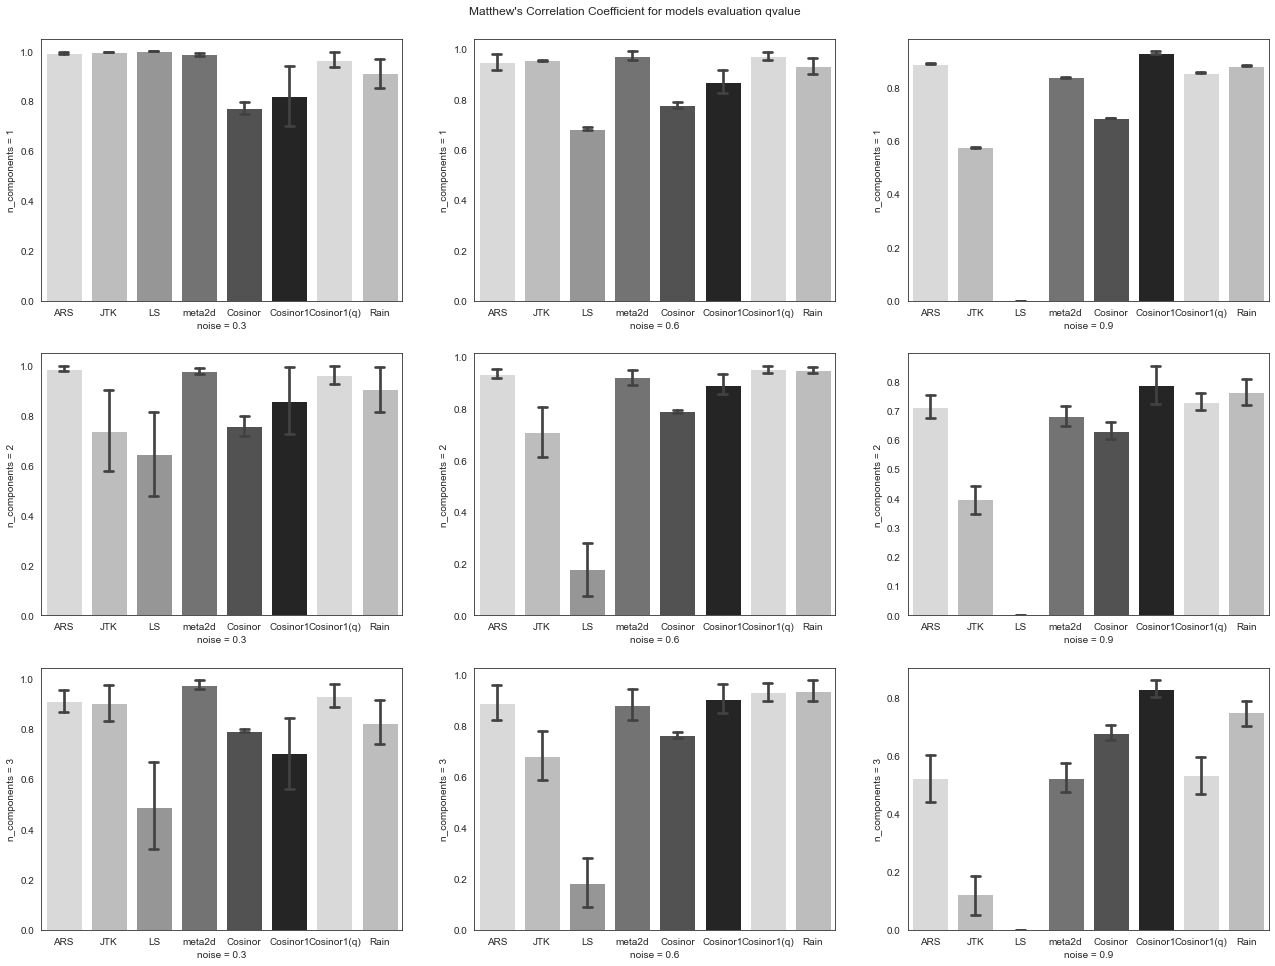

In [3]:
#mcc models evaluation qvalue
os.makedirs(f'Out/Images', exist_ok=True)
ncols = 3
nrows = 3
plt.rcParams.update({'font.size': 10})
fig, axes = plt.subplots(ncols = ncols, nrows = nrows, sharey=False)
axes = axes.flatten()       
fig.set_size_inches(22, 15)
sns.set_style("white")
flatui = ['#d9d9d9','#bdbdbd','#969696','#737373','#525252','#252525']
filenames = []
for i in [1,2,3]:
    for j in [1,2,3]:
        filename = f"c{i}_n0{3*j}.csv"
        filenames.append(filename)
for ax, filename in zip(axes,filenames):
            df_metrics = pd.read_csv(f"Out/{filename[:-4]}_t0/qv_metrics_{filename[:-4]}_t0.csv")
            for tnb in range(1,6):
                df_metrics = pd.concat([df_metrics, pd.read_csv(f"Out/{filename[:-4]}_t{tnb}/qv_metrics_{filename[:-4]}_t{tnb}.csv")])
            #sns.barplot(data=df_metrics.drop(index=5,axis=1), x='model', y='mcc', ax=ax, ci=68, capsize=.2, palette=flatui) # ci=68 --> standard error!
            sns.barplot(data=df_metrics, x='model', y='mcc', ax=ax, ci=68, capsize=.2, palette=flatui) # ci=68 --> standard error!
            ax.set_ylabel(f'n_components = {filename[1]}')
            ax.set_xlabel(f'noise = 0.{filename[-5]}')
plt.suptitle(f"Matthew's Correlation Coefficient for models evaluation qvalue")
fig.subplots_adjust(top=0.95)
plt.savefig(f"Out/Images/models_qv_mcc.pdf", bbox_inches="tight", facecolor='white')
plt.show()

MCC models evaluation using pvalue

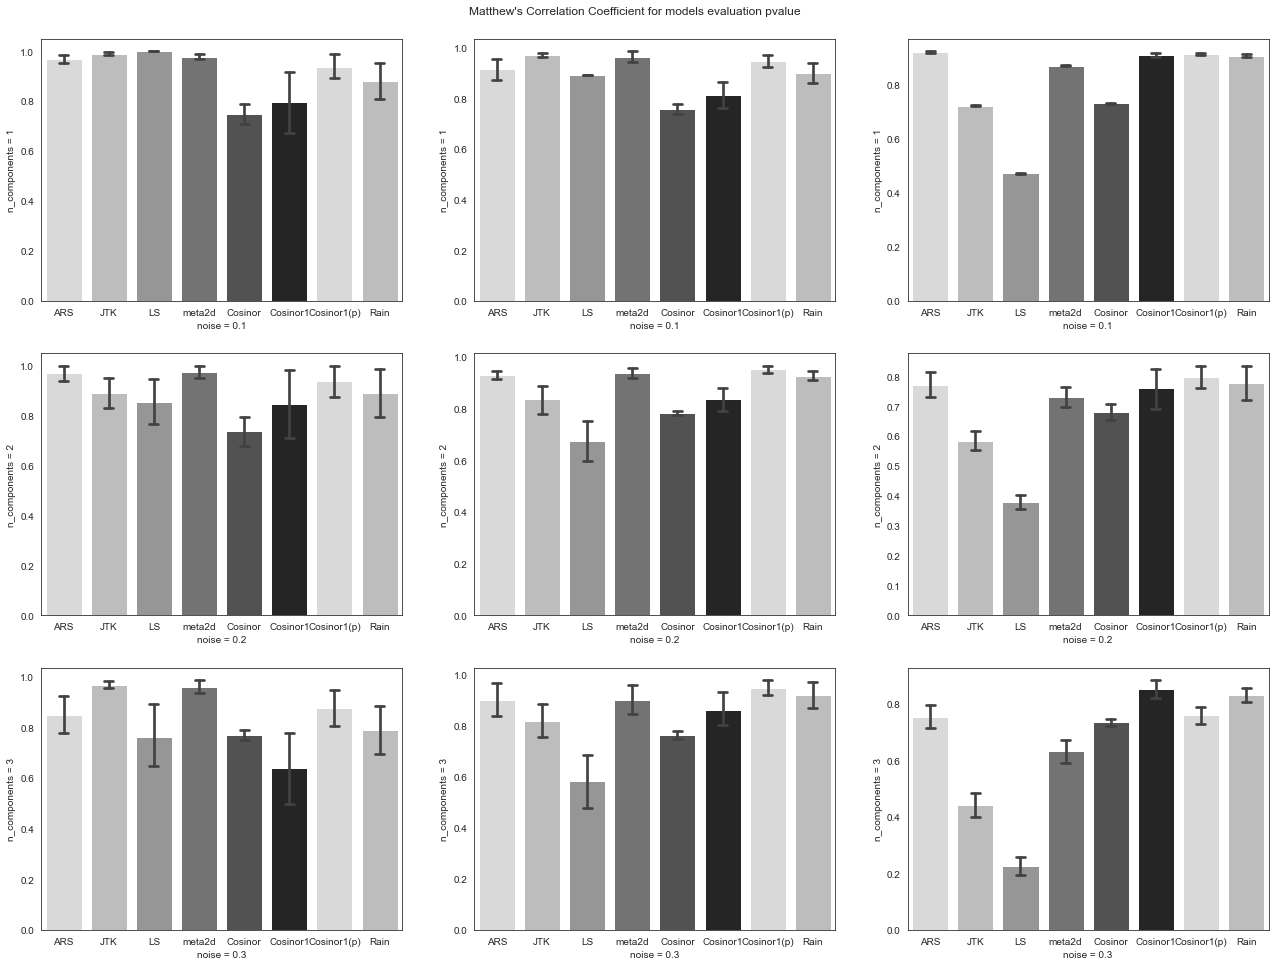

In [5]:
#mcc models evaluation pvalue
ncols = 3
nrows = 3
plt.rcParams.update({'font.size': 10})
fig, axes = plt.subplots(ncols = ncols, nrows = nrows, sharey=False)
axes = axes.flatten()         
fig.set_size_inches(22, 15)
sns.set_style("white")
flatui = ['#d9d9d9','#bdbdbd','#969696','#737373','#525252','#252525']
filenames = []
for i in [1,2,3]:
    for j in [1,2,3]:
        filename = f"c{i}_n0{3*j}"
        filenames.append(filename)
for ax, filename in zip(axes,filenames):
            df_metrics = pd.read_csv(f"Out/{filename}_t0/pv_metrics_{filename}_t0.csv")
            for tnb in range(1,6):
                df_metrics = pd.concat([df_metrics, pd.read_csv(f"Out/{filename}_t{tnb}/pv_metrics_{filename}_t{tnb}.csv")])
            #sns.barplot(data=df_metrics.drop(index=5,axis=1), x='model', y='mcc', ax=ax, ci=68, capsize=.2, palette=flatui) # ci=68 --> standard error!
            sns.barplot(data=df_metrics, x='model', y='mcc', ax=ax, ci=68, capsize=.2, palette=flatui) # ci=68 --> standard error!
            ax.set_ylabel(f'n_components = {filename[1]}')
            ax.set_xlabel(f'noise = 0.{filename[-5]}')
plt.suptitle(f"Matthew's Correlation Coefficient for models evaluation pvalue")
fig.subplots_adjust(top=0.95)
plt.savefig(f"Out/Images/models_pv_mcc.pdf", bbox_inches="tight", facecolor='white')
plt.show()

## Other Metrics Plots 

Plot models metrics for each dataset

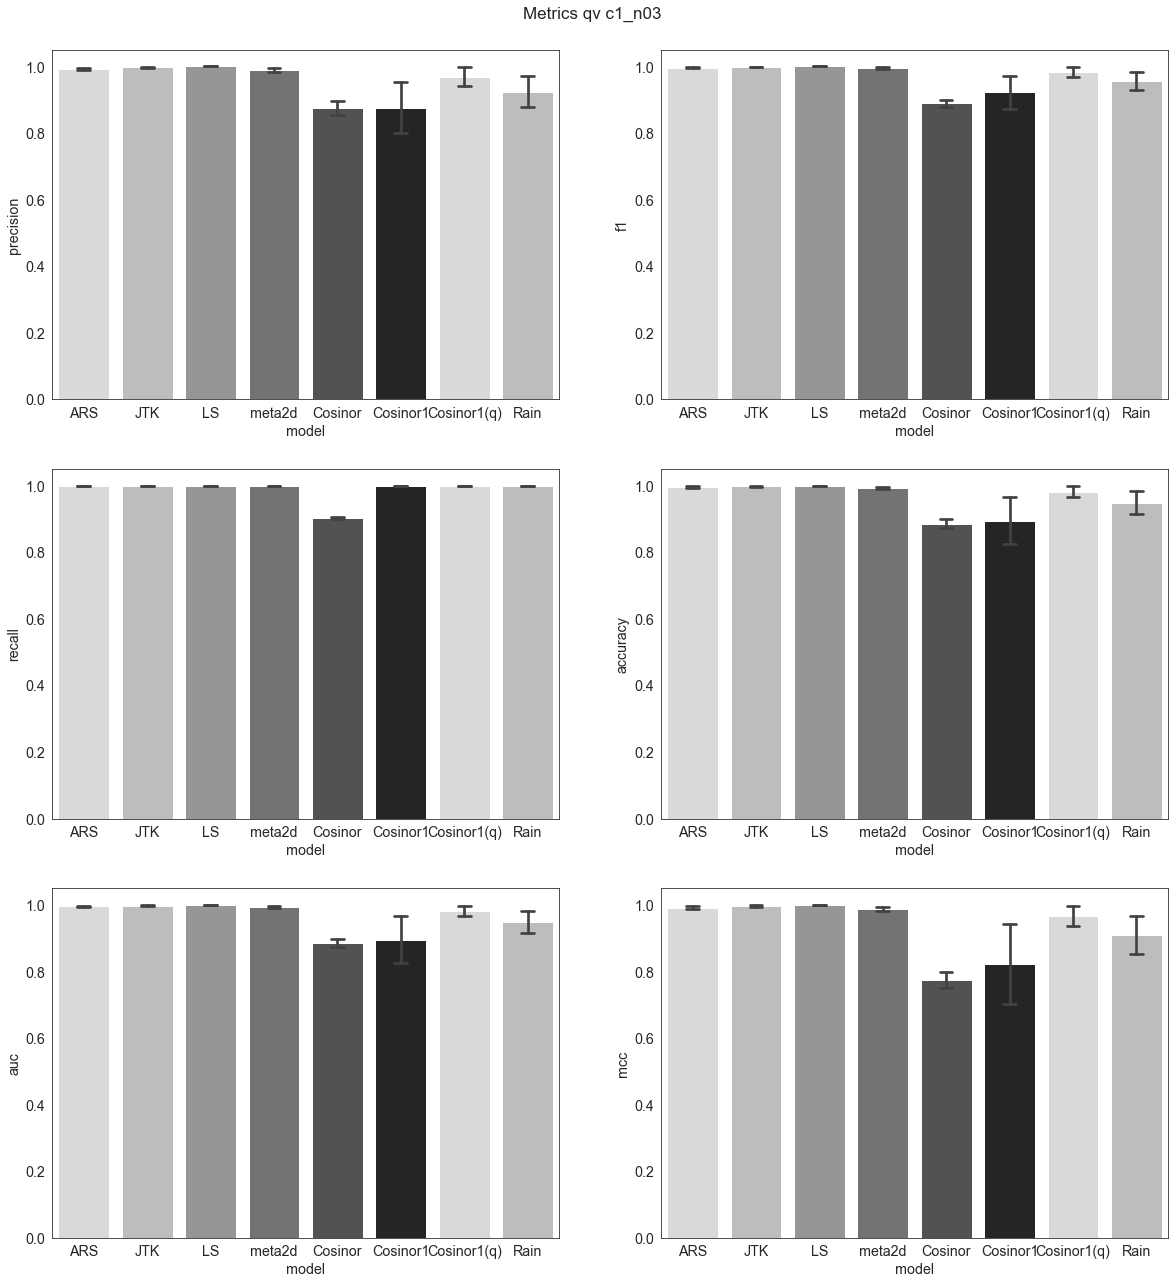

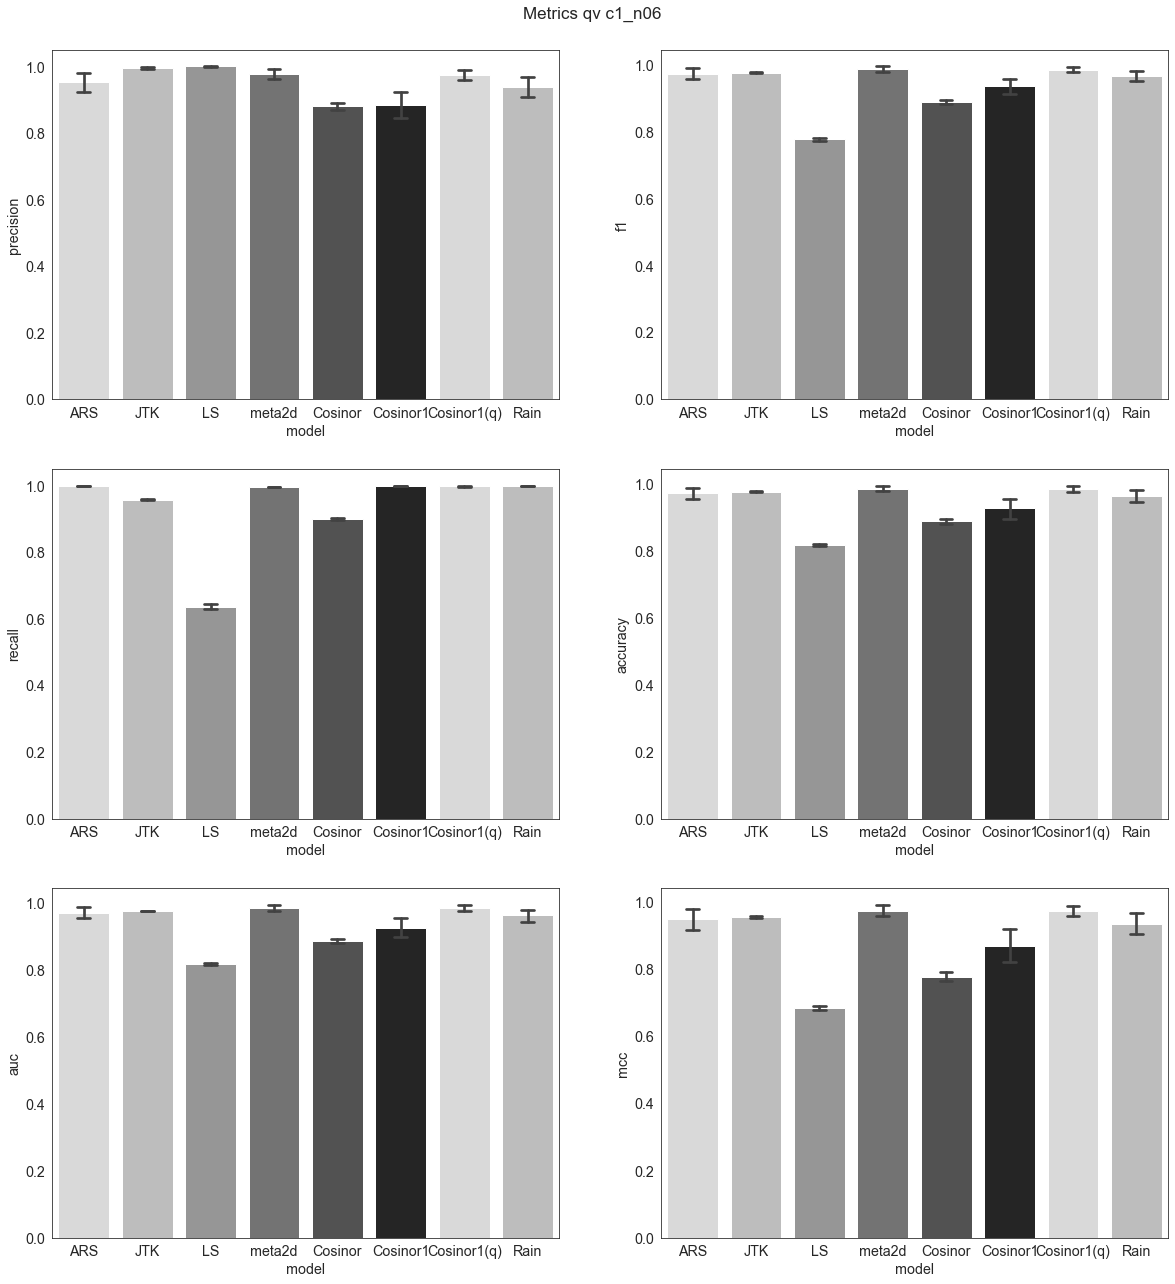

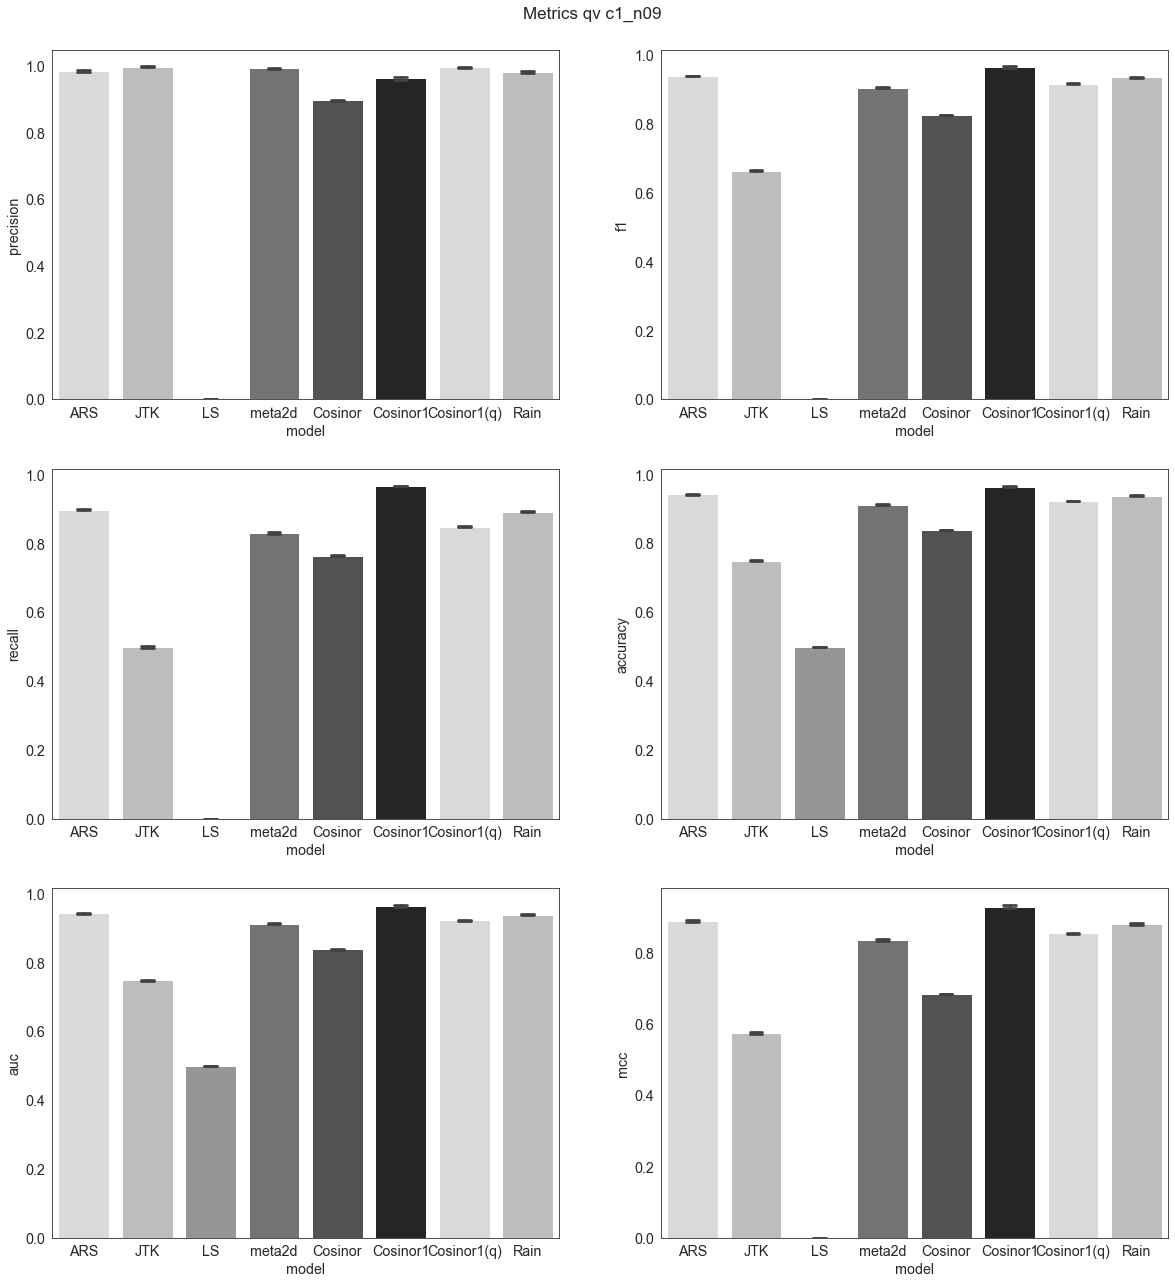

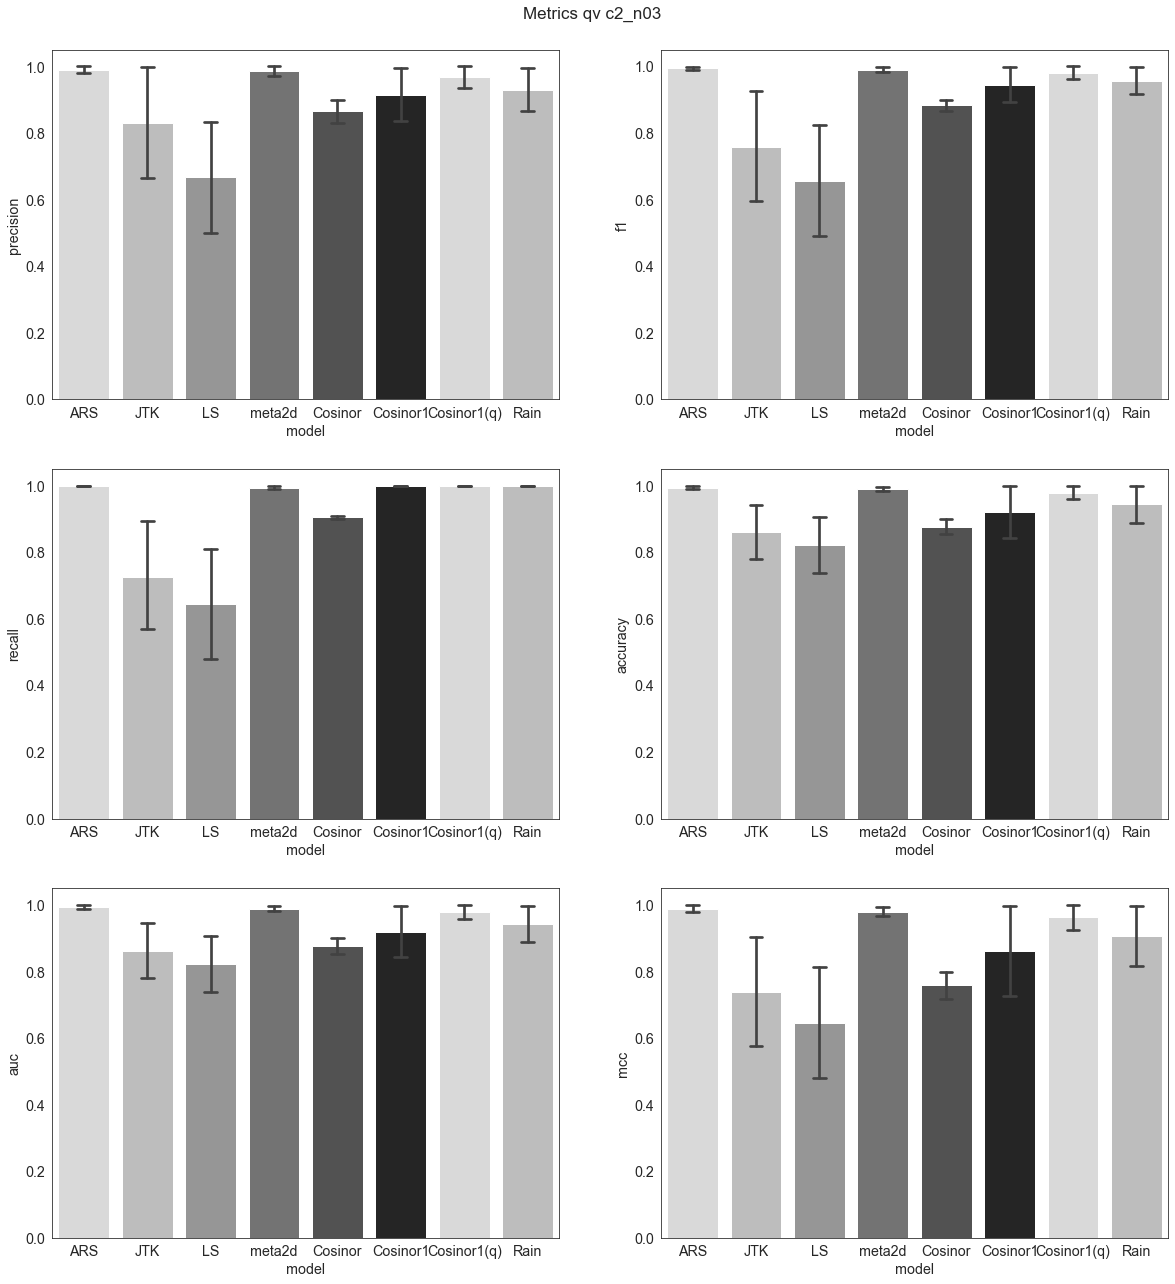

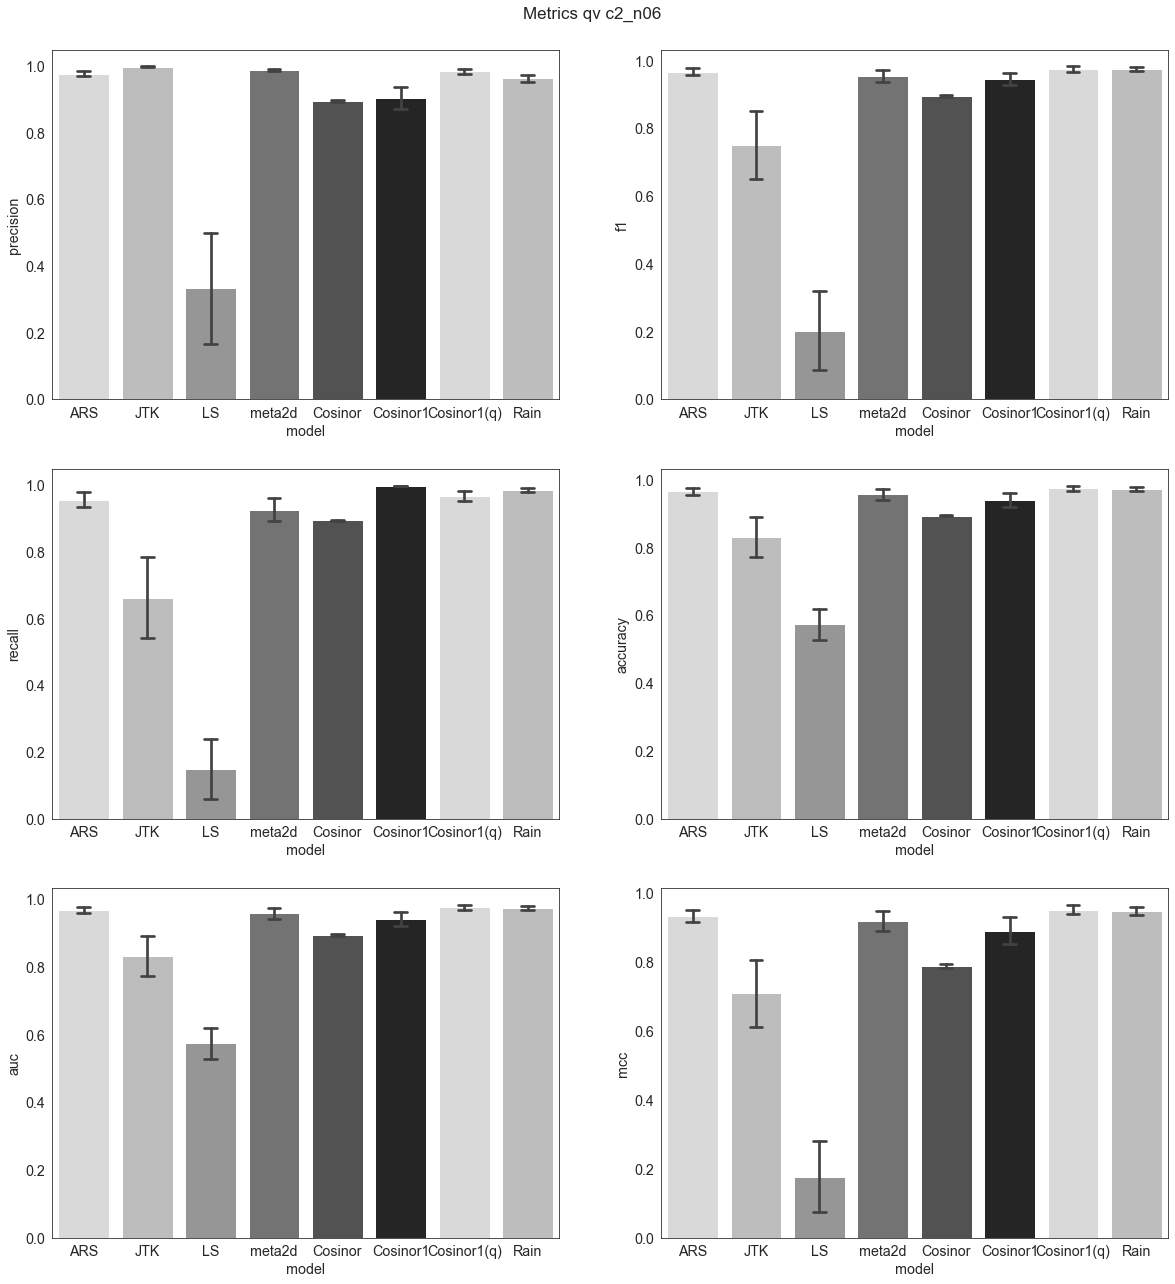

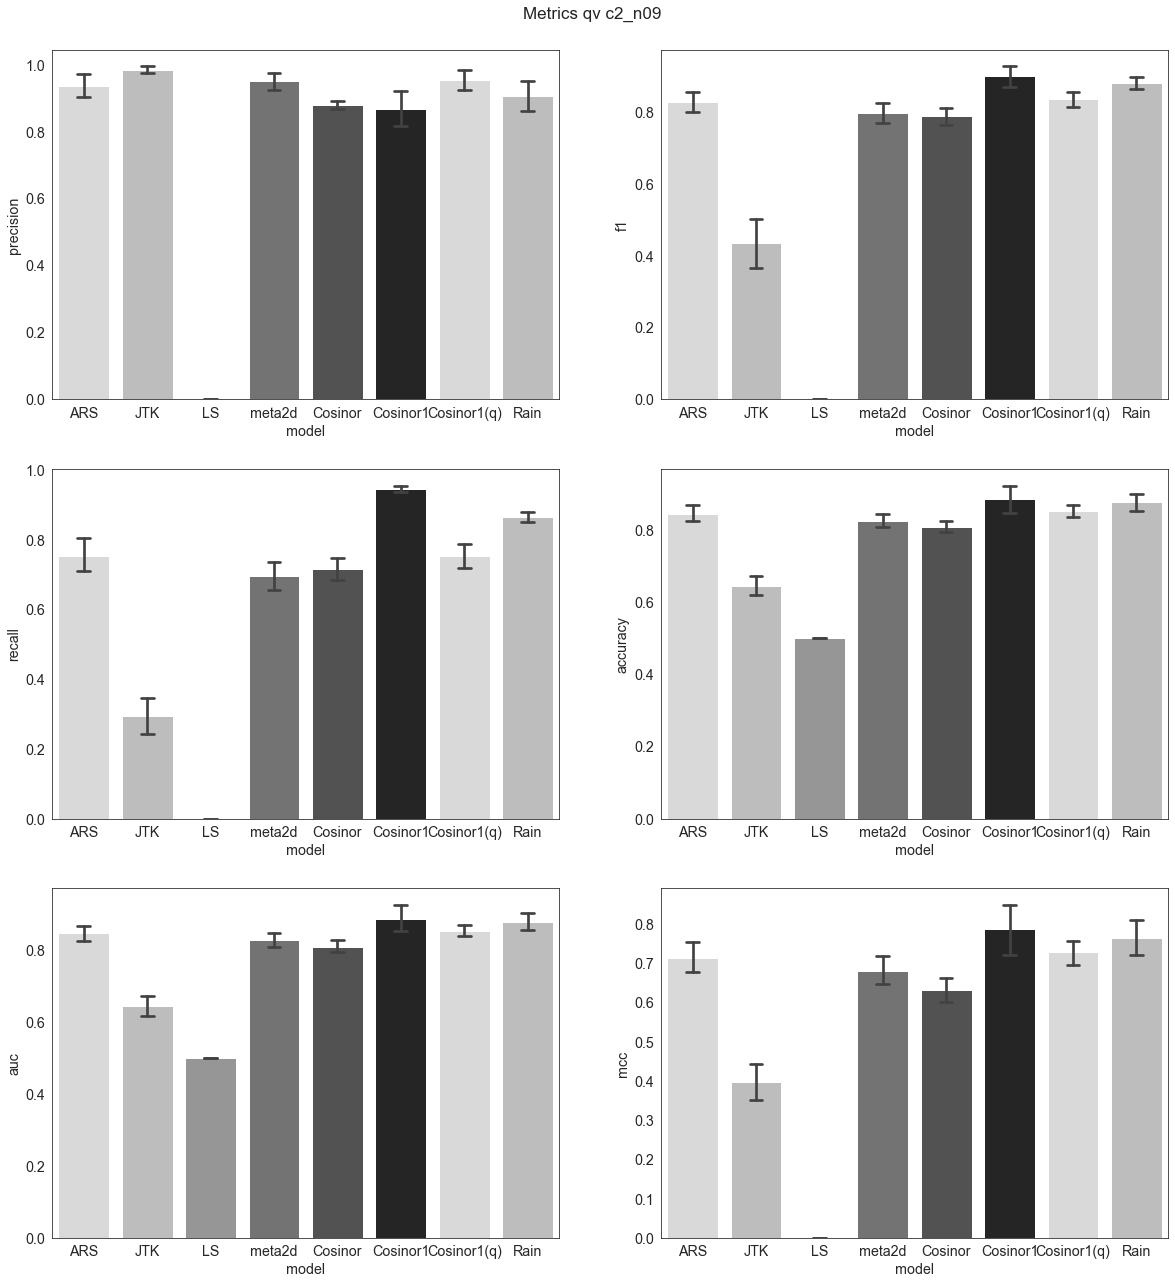

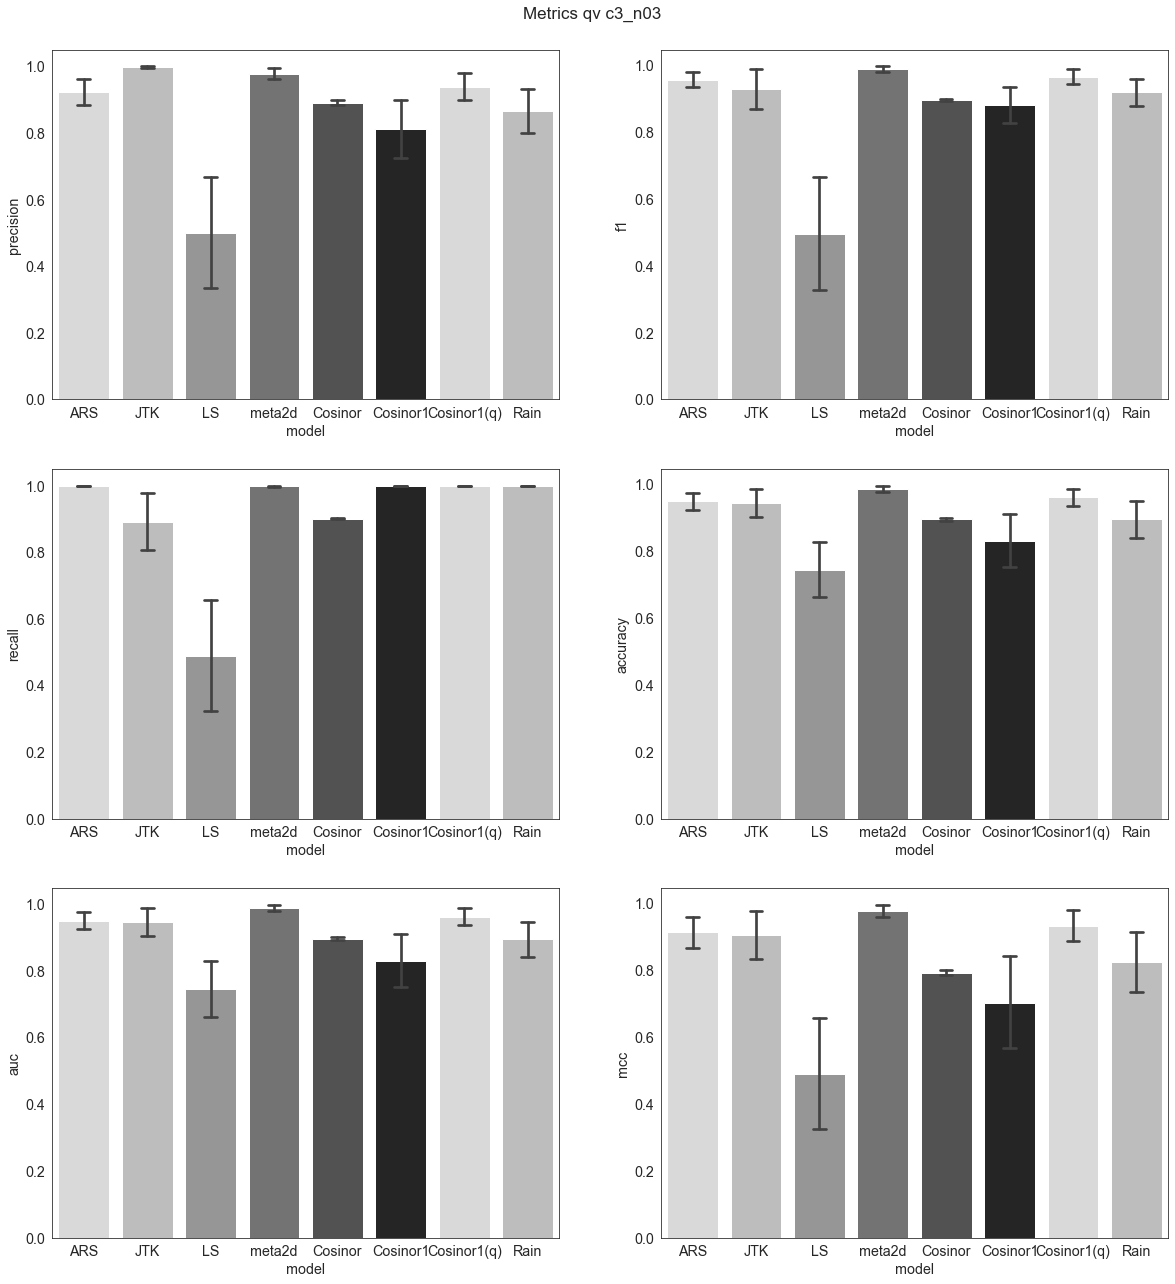

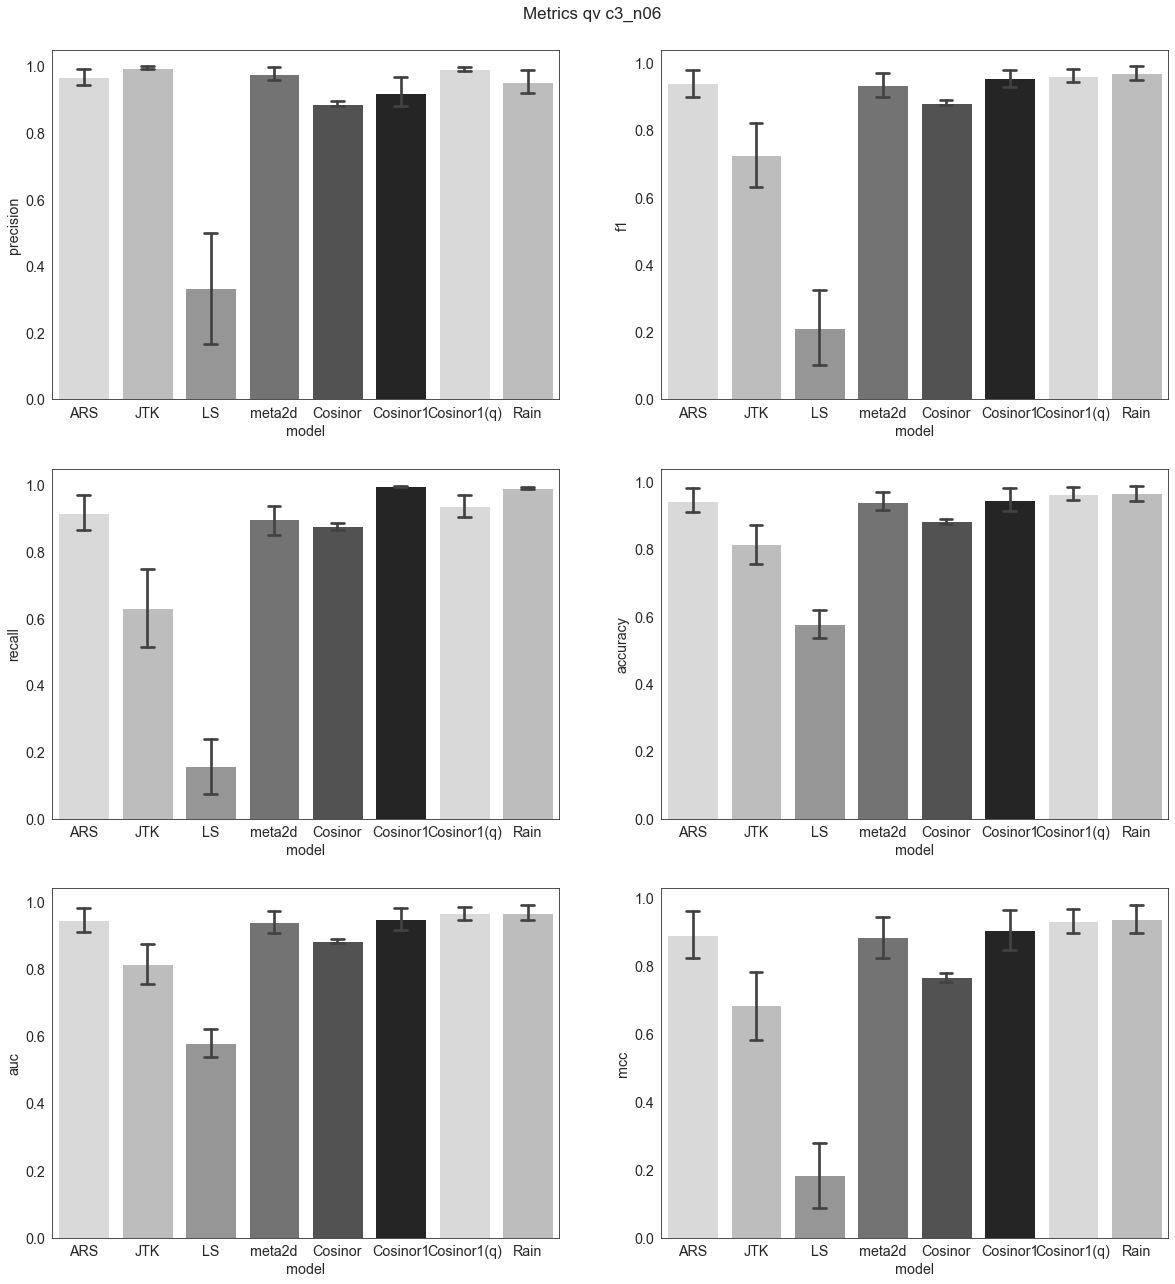

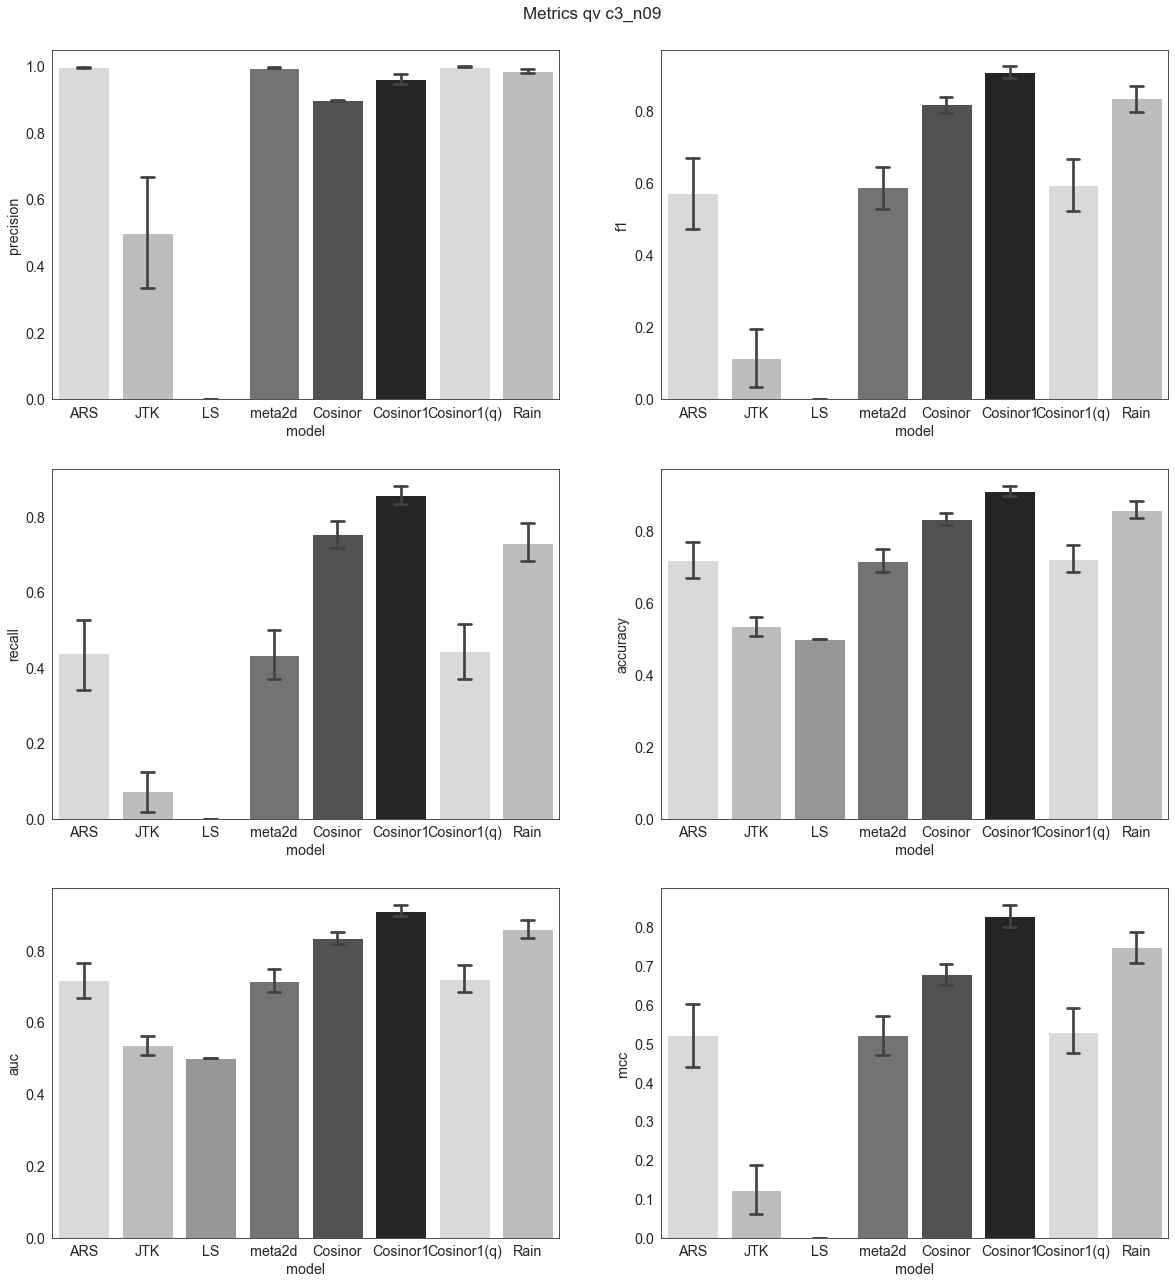

In [7]:
#metrics by dataset
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.rcParams.update({'font.size': 14.2})
df_metrics= pd.DataFrame()
for x in range(6):
    for i in [1,2,3]:
        for j in [1,2,3]:
            filename=f"c{i}_n0{3*j}_t{x}"
            df_tmp = pd.read_csv(f"Out/{filename}/qv_metrics_{filename}.csv")
            df_tmp['filename']=filename[:-3]
            df_metrics =pd.concat([df_metrics,df_tmp])
sns.set_style("white")
flatui = ['#d9d9d9','#bdbdbd','#969696','#737373','#525252','#252525']
ncols = 2
nrows = 3
metrics = ["precision", "f1", "recall", "accuracy", "auc", "mcc"]
filenames = []
for i in [1,2,3]:
    for j in [1,2,3]:
        filename = f"c{i}_n0{3*j}"
        filenames.append(filename)
for filename in filenames:
    fig, axes = plt.subplots(ncols = ncols, nrows = nrows, sharey=False)
    axes = axes.flatten()         
    fig.set_size_inches(20, 20)
    for ax, metric in zip(axes, metrics):
        sns.barplot(data=df_metrics[df_metrics['filename']==filename], x='model', y=metric, ax=ax, ci=68, capsize=.2,palette=flatui) # ci=68 --> standard error!
        ax.set_ylabel(metric)
    plt.suptitle(f'Metrics qv {filename}')
    fig.subplots_adjust(top=0.95)
    plt.savefig(f"Out/Images/{filename}_qv_metrics.pdf", bbox_inches="tight", facecolor='white')
    plt.show()

Plot global view for each model with their metrics on different dataset

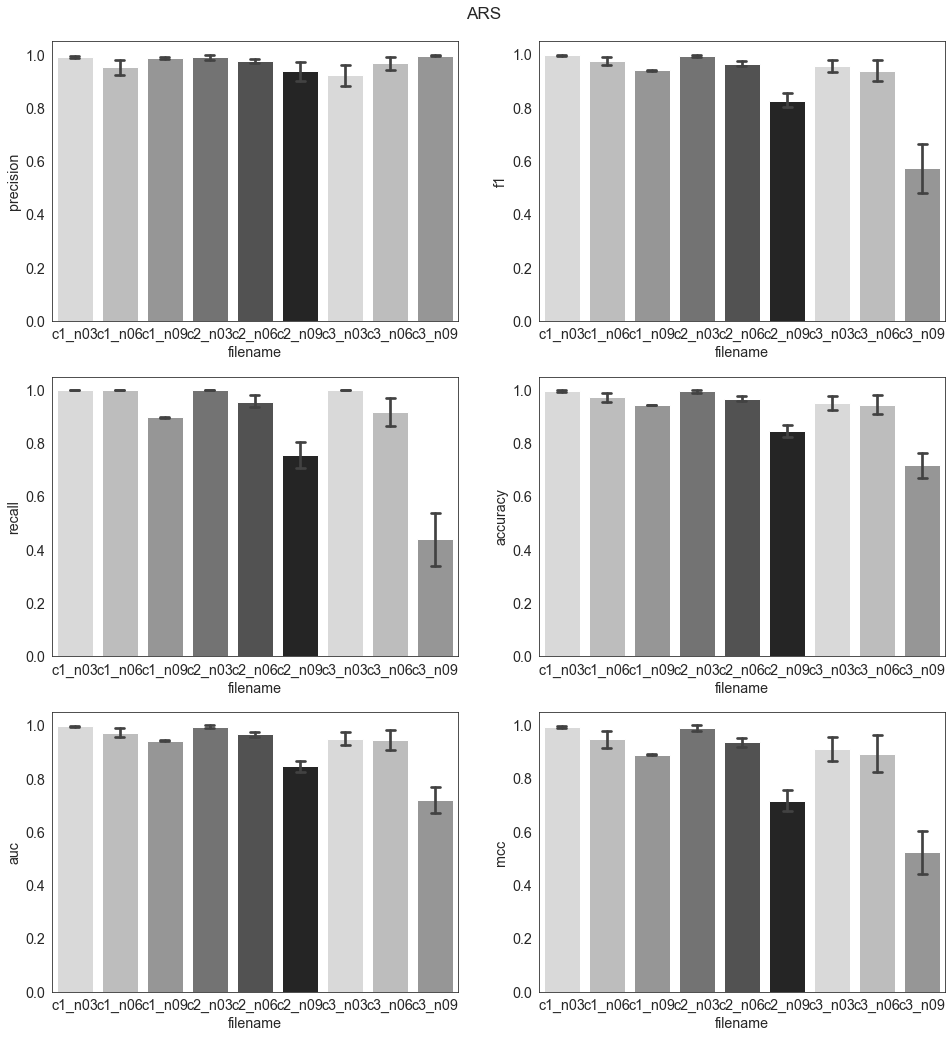

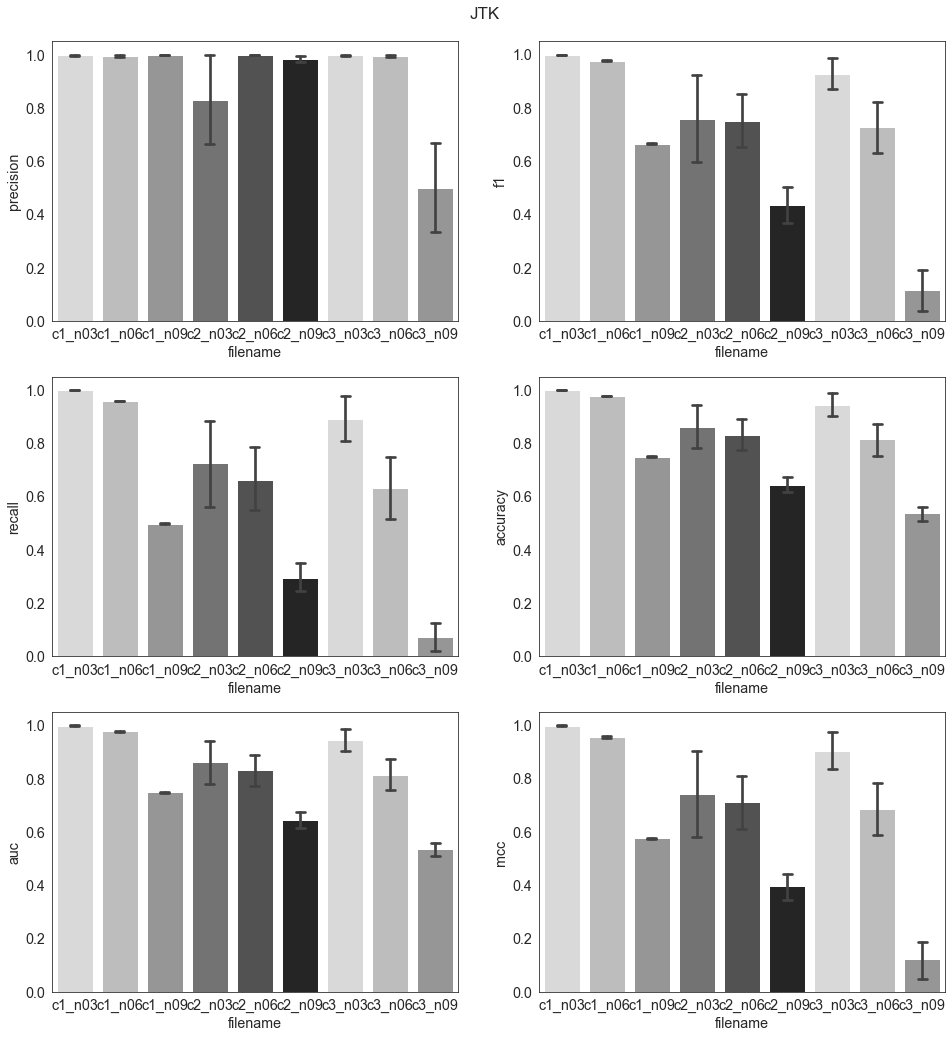

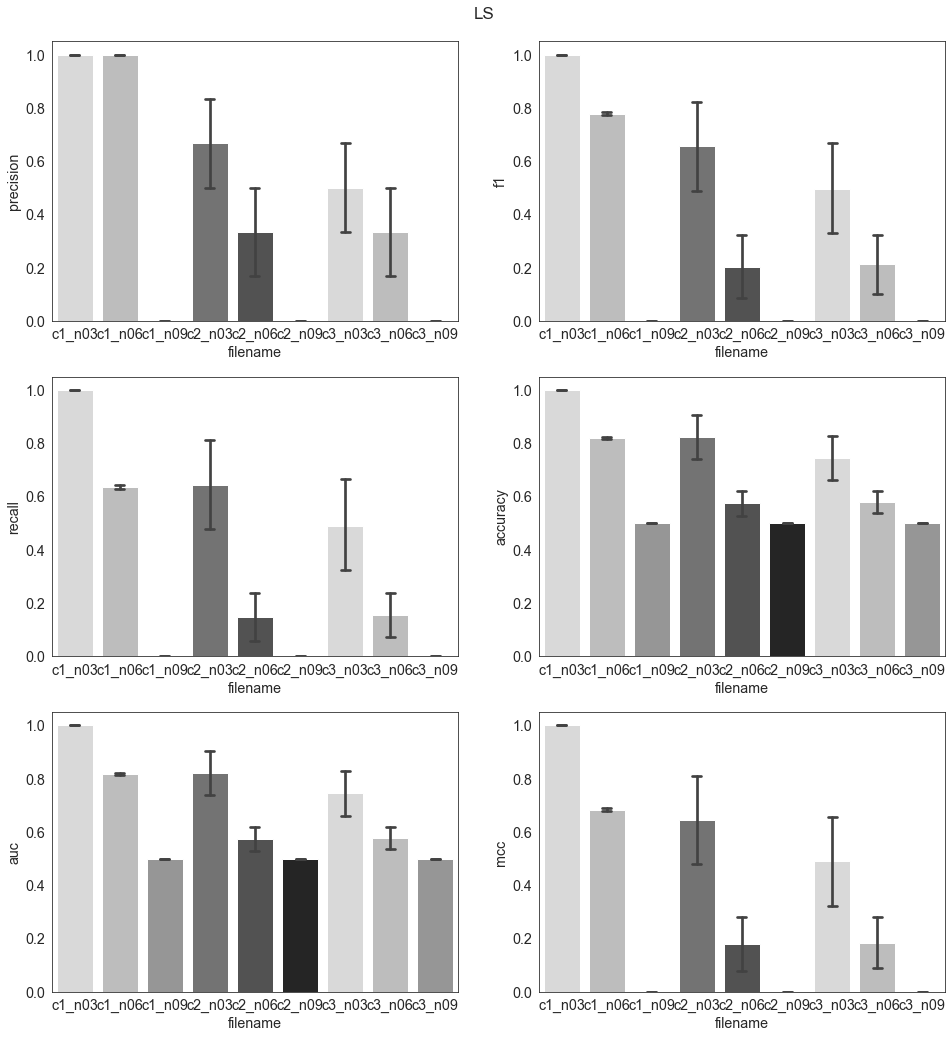

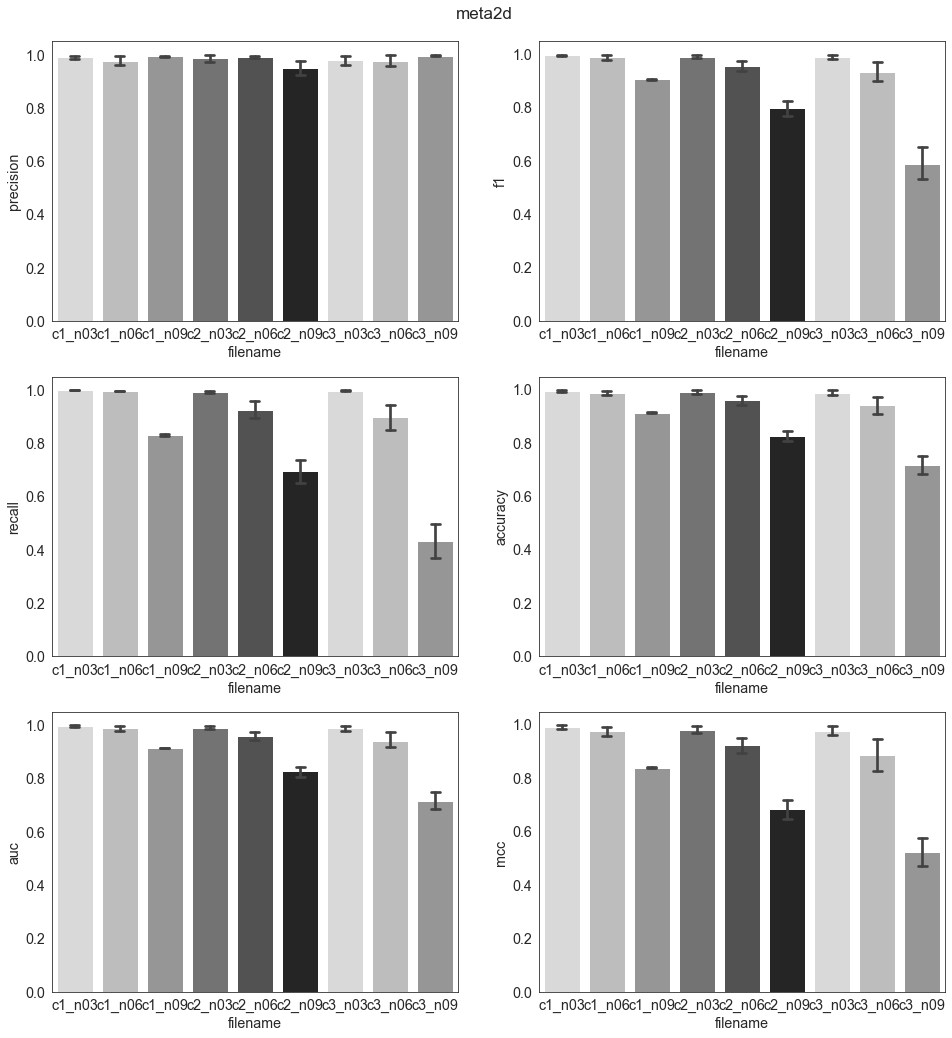

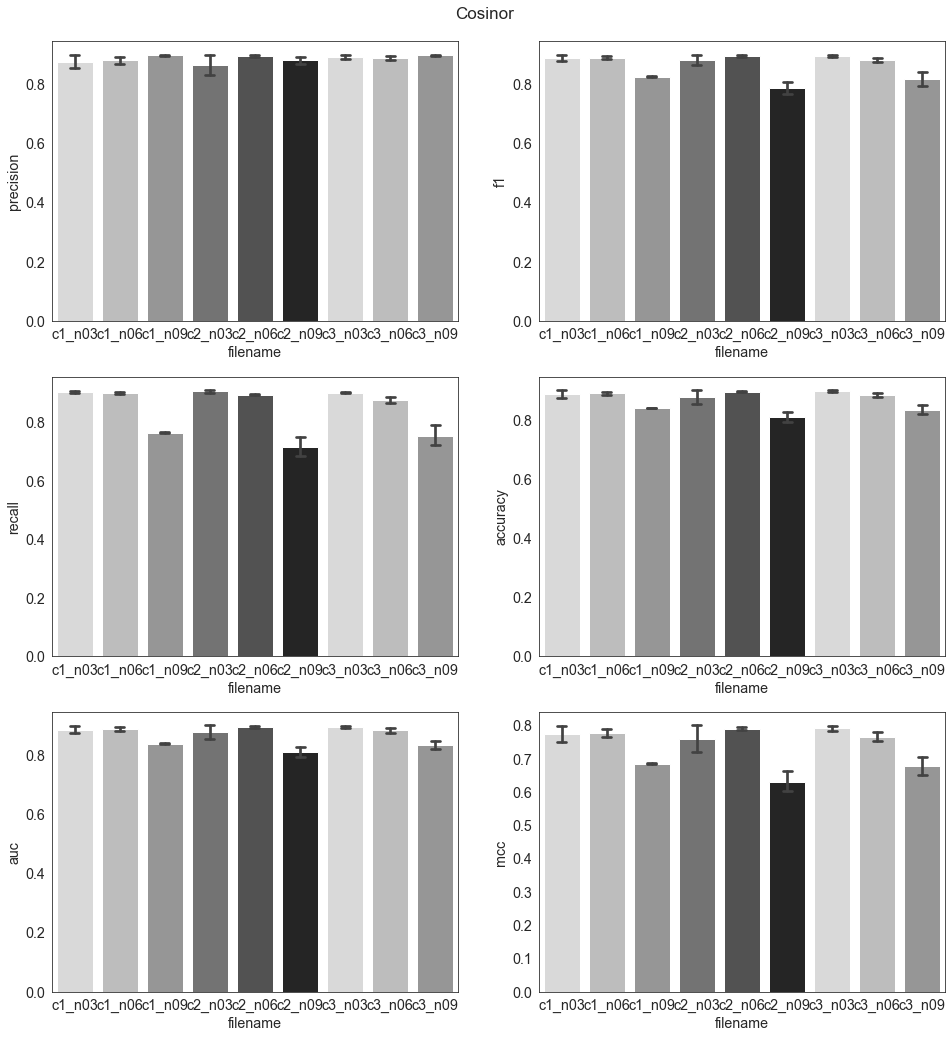

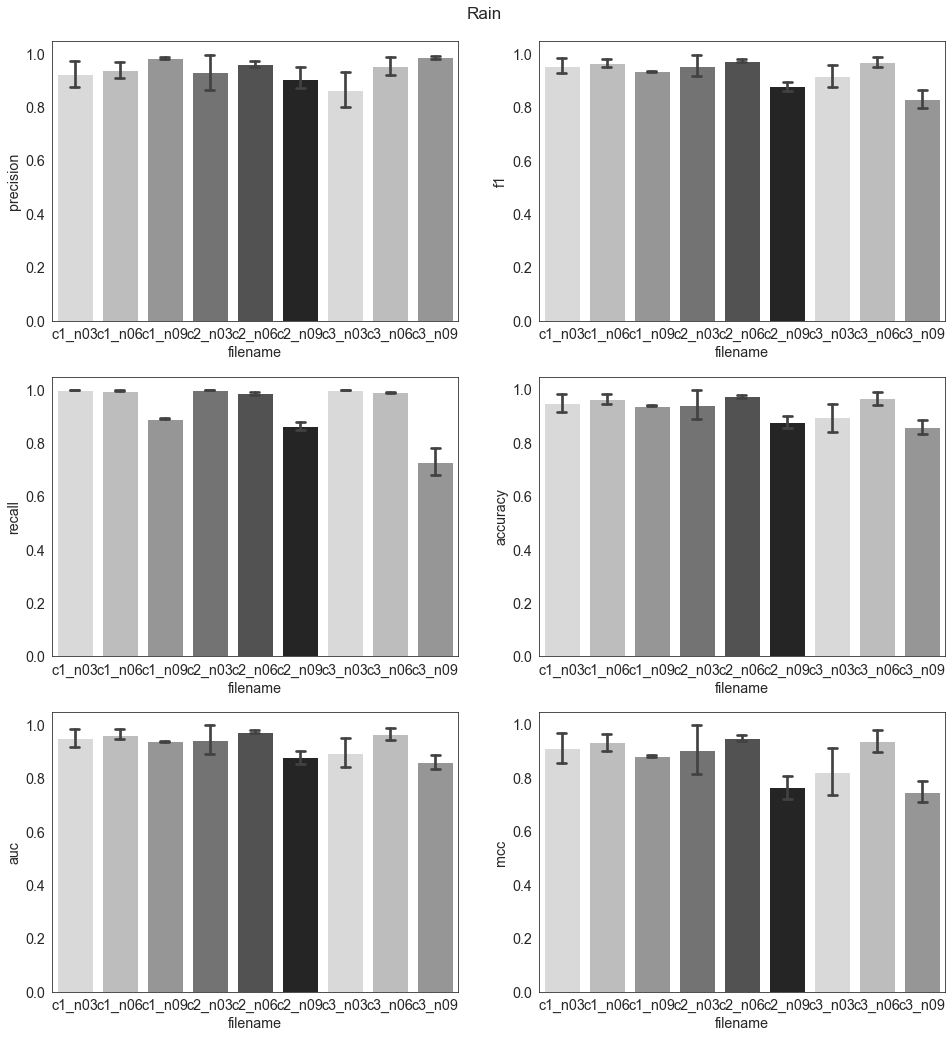

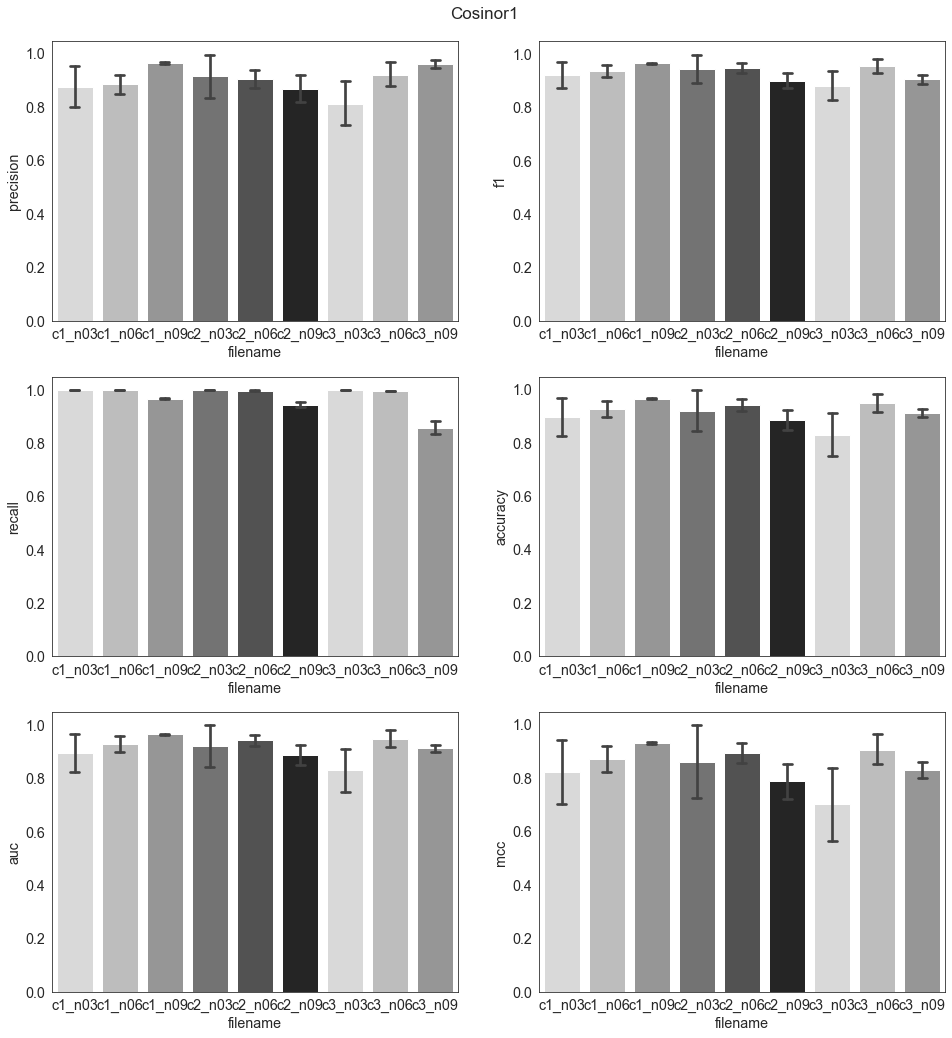

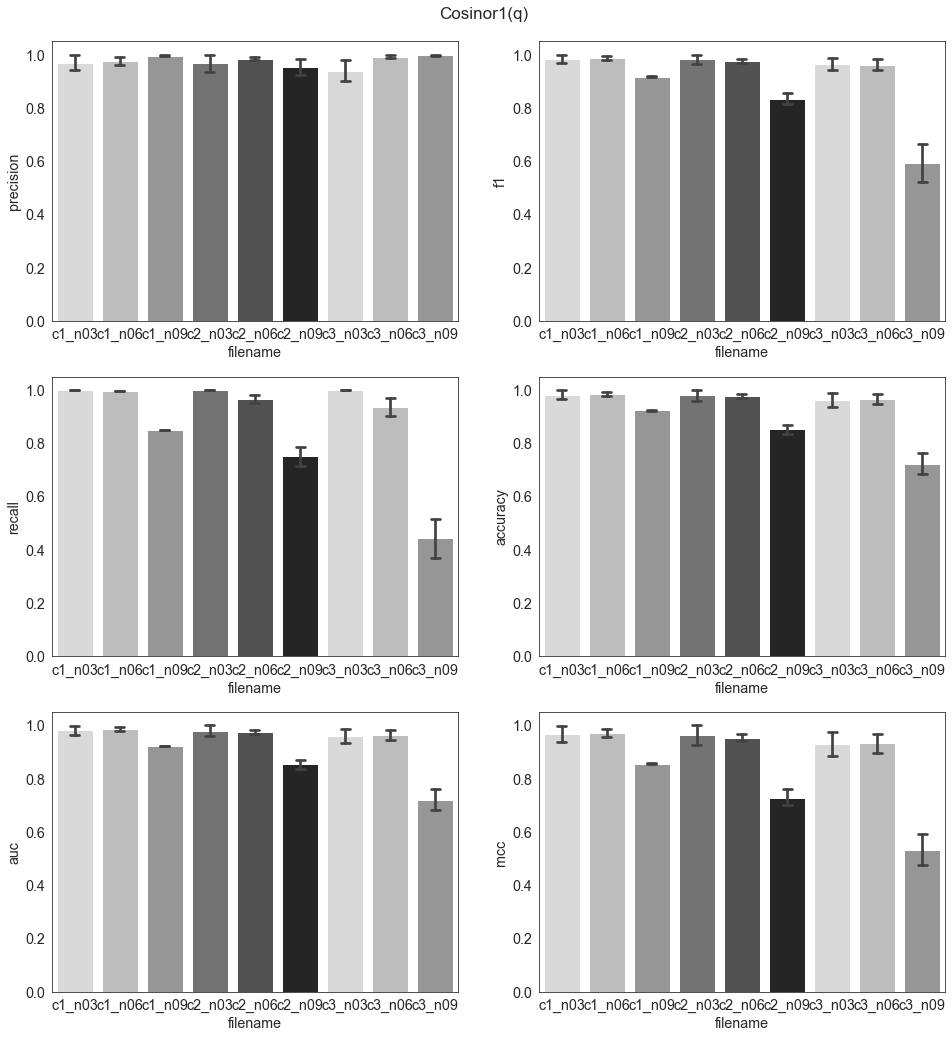

In [9]:
#global models evaluation
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
df_metrics= pd.DataFrame()
plt.rcParams.update({'font.size': 14.2})
for x in range(6):
    for i in [1,2,3]:
        for j in [1,2,3]:
            filename=f"c{i}_n0{3*j}_t{x}"
            df_tmp = pd.read_csv(f"Out/{filename}/qv_metrics_{filename}.csv")
            df_tmp['filename']=filename[:-3]
            df_metrics =pd.concat([df_metrics,df_tmp])
sns.set_style("white")
flatui = ['#d9d9d9','#bdbdbd','#969696','#737373','#525252','#252525']
ncols = 2
nrows = 3
models = ['ARS','JTK','LS','meta2d','Cosinor','Rain','Cosinor1','Cosinor1(q)']
metrics = ["precision", "f1", "recall", "accuracy", "auc", "mcc"]
for model in models:
    fig, axes = plt.subplots(ncols = ncols, nrows = nrows, sharey=False)
    axes = axes.flatten()         
    fig.set_size_inches(16, 16)
    for ax, metric in zip(axes, metrics):
        sns.barplot(data=df_metrics[df_metrics['model']==model], x='filename', y=metric, ax=ax, ci=68, capsize=.2, palette=flatui) # ci=68 --> standard error!
        #ax.set_xticklabels(df['filename'].to_numpy(), rotation=45)
        ax.set_ylabel(metric)
    plt.suptitle(model)
    fig.subplots_adjust(top=0.95)
    plt.savefig(f"Out/Images/{model}_qv_metrics.pdf", bbox_inches="tight",facecolor='white')
    plt.show()